# Loading and Viewing Data

Here,we going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.

The .shape and .columns attributes let us see the shape of the DataFrame and obtain a list of its columns. From here, we can see which columns are relevant to the questions we'd like to ask of the data. To this end, a new DataFrame, df_subset, consisting only of these relevant columns, has been pre-loaded. 

In [2]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)
df_subset=df[1000:2000]
# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())


C:\Users\Subham\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

The .info() method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow us to confirm whether the 'Initial Cost' and 'Total Est. Fee' columns are numeric or strings. From the results, we'll also be able to see whether or not all columns have complete data in them. 

In [4]:
# Print the info of df
print(df.info())
print('\n\n\n')
# Print the info of df_subset
print(df_subset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

The columns 'Initial Cost' and 'Total Est. Fee' are of type object. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. There are also a lot of 0 values. Given the amount of data that is missing in the full dataset, it's highly likely that these 0 values represent missing data.

# Exploratory Data Analysis

.describe() can only be used on numeric columns. So how can we diagnose data issues when we  have categorical data? One way is by using the .value_counts() method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called dropna which is True by default. What this means is if we have missing data in a column, it will not give a frequency count of them. We want to set the dropna column to False so if there are missing values in a column, it will give us the frequency counts.

In [7]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))
print('\n\n\n')
# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))
print('\n\n\n')
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))


MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64




NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
KS        6
GA        6
MA        6
VA        5
CO        4
MN        3
WI        3
AZ        3
SC        3
RI        2
UT        2
NC        2
NM        1
VT        1
IN        1
MI        1
WA        1
Name: State, dtype: int64




NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


NOTE
_____

Notice how not all values in the 'State' column are NY. This is an interesting find, as this data is supposed to consist of applications filed in NYC. 

All the 'Borough' values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset.

Also, for the 'Site Fill' column, we may or may not need to recode the NOT APPLICABLE values to NaN in your final analysis.

# Visualizing Data

Up until now, we've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling us is to plot and visualize the data.

We'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is 'Existing Zoning Sqft'.

The .plot() method allows us to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - kind='hist', for example, plots a histogram.

In [9]:
df['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

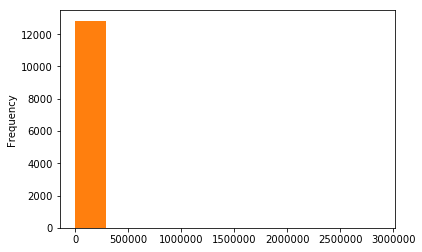

In [11]:
df['Existing Zoning Sqft'].plot(kind='hist')
plt.show()

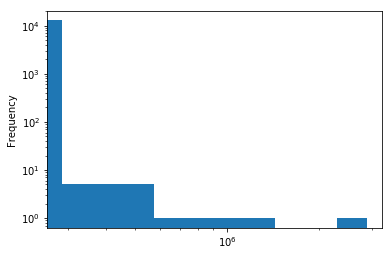

In [13]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt 

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist',logx=True, logy=True) #Rotate the axis labels by 70 degrees

# Display the histogram
plt.show()

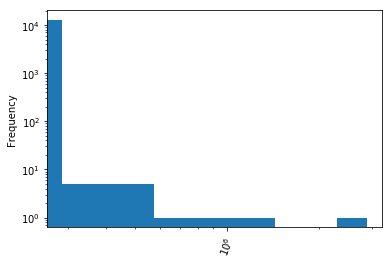

In [12]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt 

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True) #Rotate the axis labels by 70 degrees

# Display the histogram
plt.show()

While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.



Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical. 

In [23]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='Initial Cost',by='Borough', rot=90)

# Display the plot
plt.plot()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

We can see the 2 extreme outliers are in the borough of Manhattan. An initial guess could be that since land in Manhattan is extremely expensive, these outliers may be valid data points. Again, further investigation is needed to determine whether or not you can drop or keep those points in your data.

##### Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

In [24]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

KeyError: 'initial_cost'

From the second plot it seems like there is a strong correlation between 'initial_cost' and 'total_est_fee'. In addition, take note of the large number of points that have an 'initial_cost' of 0. It is difficult to infer any trends from the first plot because it is dominated by the outliers.